<a href="https://colab.research.google.com/github/gopiprasad008/gopipprasad/blob/main/Copy_of_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

**Importing the dataset**

In [ ]:
df= pd.read_csv("/content/Social_Network_Ads.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:

## dataset shape 
print(f"{'shape of the dataset'.title()} :- {df.shape}")

## sample data
print(f"{'sample dataset'.title()} :- \n {df.head()}")

## missing values
print(f"\n {'Number of null values in every column'.title()} \n {df.isnull().sum()}")

## duplicate values
print(f"\n {'number of duplicate values'.title()} :- {len(df.loc[df.duplicated()])}")

## target value count 
print(f"\n {'count of each value of target column'.title()} \n {df.EstimatedSalary.value_counts()}")
#print(f"\n {'count of each value of target column'.title()} \n {df.Age.value_counts()}")

## information about dataset
print(f"{'dataset info'.title()} \n ")
df.info()
# describe the information from the dataset
df.describe()

Shape Of The Dataset :- (400, 5)
Sample Dataset :- 
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

 Number Of Null Values In Every Column 
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

 Number Of Duplicate Values :- 0

 Count Of Each Value Of Target Column 
 72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: EstimatedSalary, Length: 117, dtype: int64
Dataset Info 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           -------------- 

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [ ]:
print(df.columns)
X = df.iloc[:, [1, 2, 3]].values #fts
y = df.iloc[:, -1].values #target
df.columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

# splitting the dataset for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [ ]:
X,y

(array([[1, 19, 19000],
        [1, 35, 20000],
        [0, 26, 43000],
        ...,
        [0, 50, 20000],
        [1, 36, 33000],
        [0, 49, 36000]], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1,

**Feature Scaling**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # it will learn mu and sigma and transform my data to (x-mu)/sigma
X_test = sc.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred



array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

Test set accuracy: 0.84
Test set auc: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


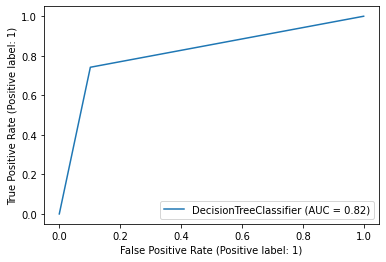

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)


In [ ]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X, y, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print(depth, trainAccuracy, np.mean(valAccuracy))

1 0.84375 0.825
2 0.915625 0.8949999999999999
3 0.915625 0.85
4 0.94375 0.8724999999999999
5 0.9625 0.875
6 0.96875 0.8649999999999999
7 0.98125 0.8574999999999999
8 0.990625 0.8425
9 0.996875 0.8424999999999999
10 0.996875 0.8400000000000001
20 0.996875 0.8424999999999999
40 0.996875 0.8325000000000001
60 0.996875 0.8425


**Predicting the Test set results**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
print("Test set R2 of dt: {:.2f}".format(rsquared))

NotFittedError: ignored

**Making the Confusion Matrix**

In [ ]:
cmat = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

**Visualising the Training set results**

In [ ]:
from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 20)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test)) # it calculates the feature importances based on IG

[(0.031323732812627125, array([ 1.        ,  0.34798083, -0.52961348])),
 (0.5020349444235818, array([ 1.        ,  0.73064017, -1.10372024])),
 (0.46664132276379106, array([-1.        , -0.321673  , -0.78796153]))]

[Text(0.4659090909090909, 0.95, 'X[1] <= 0.491\ngini = 0.455\nsamples = 320\nvalue = [208, 112]'),
 Text(0.19696969696969696, 0.85, 'X[2] <= 0.576\ngini = 0.26\nsamples = 228\nvalue = [193, 35]'),
 Text(0.06060606060606061, 0.75, 'X[2] <= 0.202\ngini = 0.051\nsamples = 191\nvalue = [186, 5]'),
 Text(0.030303030303030304, 0.65, 'gini = 0.0\nsamples = 145\nvalue = [145, 0]'),
 Text(0.09090909090909091, 0.65, 'X[1] <= -0.13\ngini = 0.194\nsamples = 46\nvalue = [41, 5]'),
 Text(0.06060606060606061, 0.55, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.12121212121212122, 0.55, 'X[2] <= 0.375\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.09090909090909091, 0.45, 'X[2] <= 0.231\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.06060606060606061, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12121212121212122, 0.35, 'X[2] <= 0.26\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.06060606060606061, 0.25, 'X[0] <= 0.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),

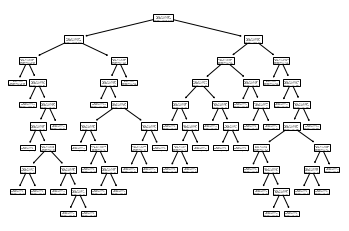

In [ ]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt

**Visualising the Test set results**

In [ ]:
dt.predict_proba(X_test)


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.8375